In [ ]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [11]:
path = r"C:\Users\Davi\Documents\Projetos\FIAP\FASE 5\Enterprise_Challenge_FASE3\config\Dados_simulados.csv"
df = pd.read_csv(path, sep=';')
df[['vl_temperatura', 'vl_corrente']] = df[['vl_temperatura', 'vl_corrente']].round(2)
df['vl_vibracao'] = df['vl_vibracao'].astype(int)
display(df)

,id_registro,id_sensor,id_maquina,id_lote,timestamp_registro,vl_temperatura,vl_vibracao,vl_corrente
0,1,1,2,4,2025-08-01 03:00:00.000000000,74.51,3,148.53
1,2,8,5,3,2025-08-01 03:16:35.195010662,71.34,2,146.16
2,3,6,2,3,2025-08-01 03:33:10.390021086,71.22,5,140.02
3,4,10,3,4,2025-08-01 03:49:45.585031748,75.61,4,150.00
4,5,1,5,1,2025-08-01 04:06:20.780042410,52.27,2,147.86
...,...,...,...,...,...,...,...,...
4995,4996,12,3,4,2025-09-27 15:49:59.077843666,81.78,5,149.57
4996,4997,6,1,5,2025-09-27 16:06:34.272854328,70.34,4,145.41
4997,4998,5,4,1,2025-09-27 16:23:09.467864990,69.60,6,154.73
4998,4999,4,1,2,2025-09-27 16:39:44.662875414,70.45,2,149.05


In [12]:
def classificar_risco_temp(temperatura):
    if temperatura < 85:
        return 'Normal'
    elif 85 <= temperatura < 95:
        return 'Atencao'
    else:
        return 'Risco Iminente'

def classificar_risco_corrente(corrente):
    if corrente <= 152:
        return 'Normal'
    elif corrente < 155:
        return 'Atencao'
    else:
        return 'Risco Iminente'

In [13]:
df_temperatura = df.copy()
df_temperatura['risco'] = df_temperatura['vl_temperatura'].apply(classificar_risco_temp)
display(df_temperatura)

,id_registro,id_sensor,id_maquina,id_lote,timestamp_registro,vl_temperatura,vl_vibracao,vl_corrente,risco
0,1,1,2,4,2025-08-01 03:00:00.000000000,74.51,3,148.53,Normal
1,2,8,5,3,2025-08-01 03:16:35.195010662,71.34,2,146.16,Normal
2,3,6,2,3,2025-08-01 03:33:10.390021086,71.22,5,140.02,Normal
3,4,10,3,4,2025-08-01 03:49:45.585031748,75.61,4,150.00,Normal
4,5,1,5,1,2025-08-01 04:06:20.780042410,52.27,2,147.86,Normal
...,...,...,...,...,...,...,...,...,...
4995,4996,12,3,4,2025-09-27 15:49:59.077843666,81.78,5,149.57,Normal
4996,4997,6,1,5,2025-09-27 16:06:34.272854328,70.34,4,145.41,Normal
4997,4998,5,4,1,2025-09-27 16:23:09.467864990,69.60,6,154.73,Normal
4998,4999,4,1,2,2025-09-27 16:39:44.662875414,70.45,2,149.05,Normal


In [14]:
df_corrente = df.copy()
df_corrente['risco'] = df_corrente['vl_corrente'].apply(classificar_risco_corrente)
display(df_corrente)

,id_registro,id_sensor,id_maquina,id_lote,timestamp_registro,vl_temperatura,vl_vibracao,vl_corrente,risco
0,1,1,2,4,2025-08-01 03:00:00.000000000,74.51,3,148.53,Normal
1,2,8,5,3,2025-08-01 03:16:35.195010662,71.34,2,146.16,Normal
2,3,6,2,3,2025-08-01 03:33:10.390021086,71.22,5,140.02,Normal
3,4,10,3,4,2025-08-01 03:49:45.585031748,75.61,4,150.00,Normal
4,5,1,5,1,2025-08-01 04:06:20.780042410,52.27,2,147.86,Normal
...,...,...,...,...,...,...,...,...,...
4995,4996,12,3,4,2025-09-27 15:49:59.077843666,81.78,5,149.57,Normal
4996,4997,6,1,5,2025-09-27 16:06:34.272854328,70.34,4,145.41,Normal
4997,4998,5,4,1,2025-09-27 16:23:09.467864990,69.60,6,154.73,Atencao
4998,4999,4,1,2,2025-09-27 16:39:44.662875414,70.45,2,149.05,Normal


Acurácia do Modelo: 99.93%

Gráfico da Matriz de Confusão salvo como 'matriz_confusao.png'


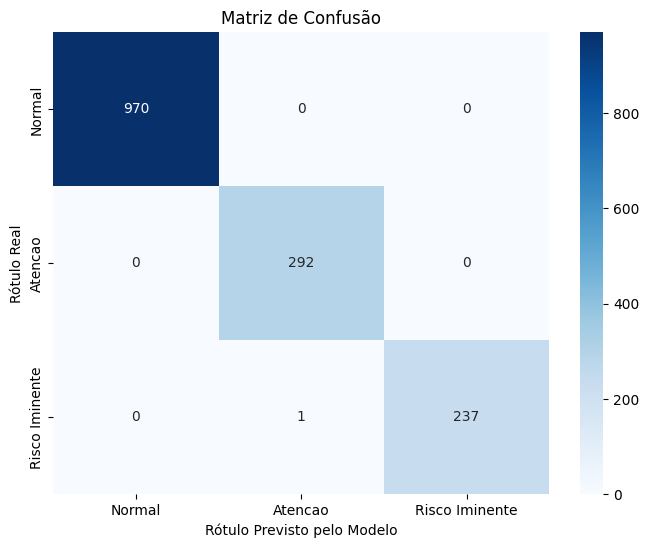

In [ ]:
## SEPARAÇÃO DADOS DE TREINO E TESTE
x_train, x_test, y_train, y_test = train_test_split(df_temperatura[['vl_temperatura']], df_temperatura['risco'], random_state=42, test_size=0.3, stratify=df_temperatura['risco'])

## Treinamento do modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(x_train, y_train)

## Predict
pred = modelo.predict(x_test)

## Teste de Acuracia
accuracy = accuracy_score(y_test, pred)
print(f"Acurácia do Modelo: {accuracy * 100:.2f}%")

# Gerar a Matriz de Confusão
cm = confusion_matrix(y_test, pred, labels=['Normal', 'Atencao', 'Risco Iminente'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Atencao', 'Risco Iminente'], 
            yticklabels=['Normal', 'Atencao', 'Risco Iminente'])
plt.xlabel('Rótulo Previsto pelo Modelo')
plt.ylabel('Rótulo Real')
plt.title('Matriz de Confusão')

# Salva a imagem da matriz de confusão em um arquivo
plt.savefig('matriz_confusao.png')
print("\nGráfico da Matriz de Confusão salvo como 'matriz_confusao.png'")
plt.show()

joblib.dump('RFC_Temp.joblib')

In [94]:
modelo = RandomForestClassifier(n_estimators=100, random_state=4)
modelo.fit(x_train, y_train)

pred = modelo.predict(x_test)

In [95]:
accuracy = accuracy_score(y_test, pred)
print(f"Acurácia do Modelo: {accuracy * 100:.2f}%")

Acurácia do Modelo: 100.00%


In [7]:
# Relatório de Classificação Detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_test, pred))



Relatório de Classificação:
                precision    recall  f1-score   support

       Atencao       1.00      1.00      1.00       292
        Normal       1.00      1.00      1.00       970
Risco Iminente       1.00      1.00      1.00       238

      accuracy                           1.00      1500
     macro avg       1.00      1.00      1.00      1500
  weighted avg       1.00      1.00      1.00      1500




Gráfico da Matriz de Confusão salvo como 'matriz_confusao.png'


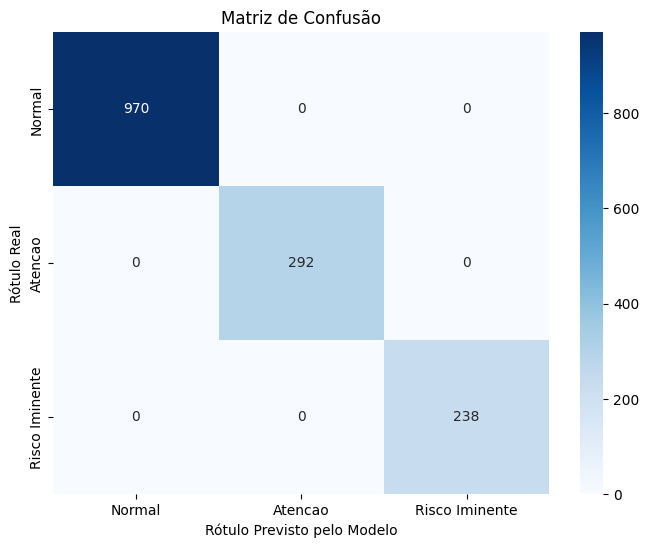

In [8]:

# Gerar a Matriz de Confusão
cm = confusion_matrix(y_test, pred, labels=['Normal', 'Atencao', 'Risco Iminente'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Atencao', 'Risco Iminente'], 
            yticklabels=['Normal', 'Atencao', 'Risco Iminente'])
plt.xlabel('Rótulo Previsto pelo Modelo')
plt.ylabel('Rótulo Real')
plt.title('Matriz de Confusão')

# Salva a imagem da matriz de confusão em um arquivo
plt.savefig('matriz_confusao.png')
print("\nGráfico da Matriz de Confusão salvo como 'matriz_confusao.png'")
plt.show()

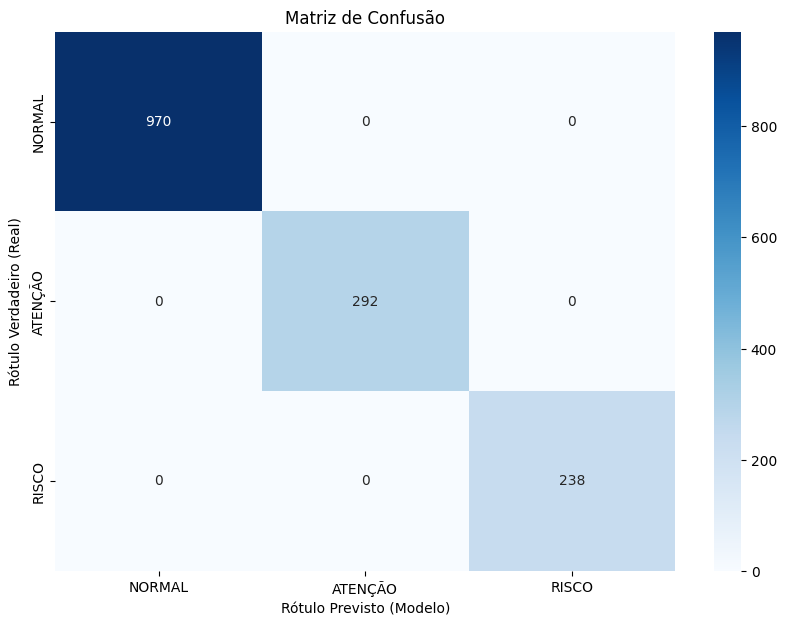

In [9]:
# Define o tamanho da figura que será gerada
plt.figure(figsize=(10, 7))

# A função principal do Seaborn para desenhar o mapa de calor (heatmap)
sns.heatmap(
    cm, 
    annot=True,      # Escreve os números dentro de cada célula do gráfico
    fmt='d',         # Formata os números como inteiros
    cmap='Blues',    # Define o esquema de cores (tons de azul)
    xticklabels=['NORMAL', 'ATENÇÃO', 'RISCO'], # Rótulos para o eixo X
    yticklabels=['NORMAL', 'ATENÇÃO', 'RISCO']  # Rótulos para o eixo Y
)

# 3. Adicionar Títulos e Rótulos para Clareza
plt.title('Matriz de Confusão')
plt.ylabel('Rótulo Verdadeiro (Real)')
plt.xlabel('Rótulo Previsto (Modelo)')

# 4. Salvar e Exibir o Gráfico
# Salva a figura gerada em um arquivo de imagem PNG
plt.savefig('matriz_confusao_resultado.png')

# Exibe o gráfico na tela (se estiver usando um ambiente como Jupyter Notebook)
plt.show()